In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
file_path = '/content/drive/My Drive/occupancydataset.csv'
df = pd.read_csv(file_path)
print(df.head(10))

    id            date  Temperature  Humidity       Light         CO2  \
0  140  02/02/15 14:19      23.7000    26.272  585.200000  749.200000   
1  141  02/02/15 14:19      23.7180    26.290  578.400000  760.400000   
2  142  02/02/15 14:21      23.7300    26.230  572.666667  769.666667   
3  143  02/02/15 14:22      23.7225    26.125  493.750000  774.750000   
4  144  02/02/15 14:23      23.7540    26.200  488.600000  779.000000   
5  145  02/02/15 14:23      23.7600    26.260  568.666667  790.000000   
6  146  02/02/15 14:25      23.7300    26.290  536.333333  798.000000   
7  147  02/02/15 14:25      23.7540    26.290  509.000000  797.000000   
8  148  02/02/15 14:26      23.7540    26.350  476.000000  803.200000   
9  149  02/02/15 14:28      23.7360    26.390  510.000000  809.000000   

   HumidityRatio  Occupancy  
0       0.004764          1  
1       0.004773          1  
2       0.004765          1  
3       0.004744          1  
4       0.004767          1  
5       0.004779

**Classification Task**


**1.Exploratory Data Analysis and Data Understanding**


<ipython-input-4-53da5b9606c6>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2665 non-null   int64         
 1   date           2665 non-null   datetime64[ns]
 2   Temperature    2665 non-null   float64       
 3   Humidity       2665 non-null   float64       
 4   Light          2665 non-null   float64       
 5   CO2            2665 non-null   float64       
 6   HumidityRatio  2665 non-null   float64       
 7   Occupancy      2665 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 166.7 KB
    id                date  Temperature  Humidity       Light         CO2  \
0  140 2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1  141 2015-02-02 14:19:00      23.7180    26.290  578.400000  760.400000   
2  142 2015-02-02 14:21:00      23.7300    26.230  572.666667

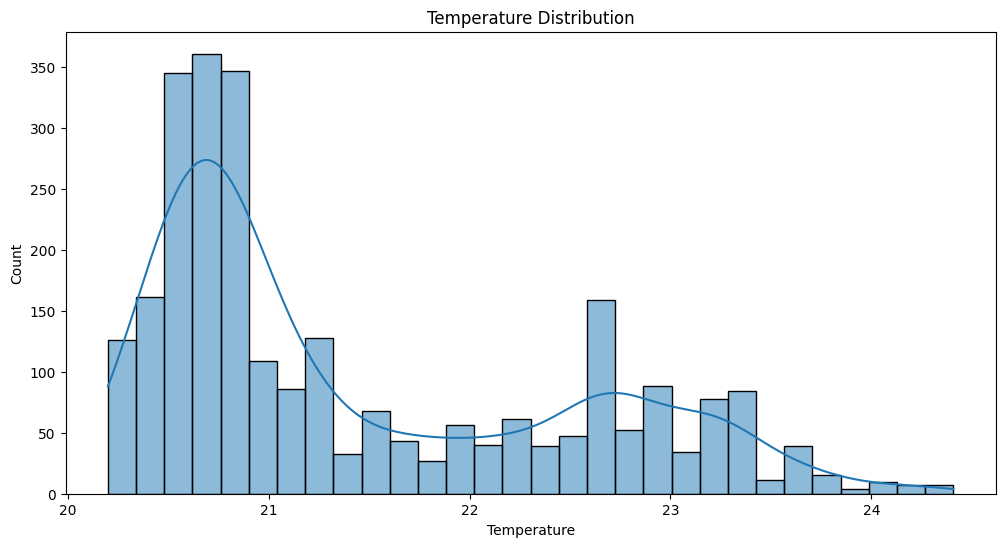

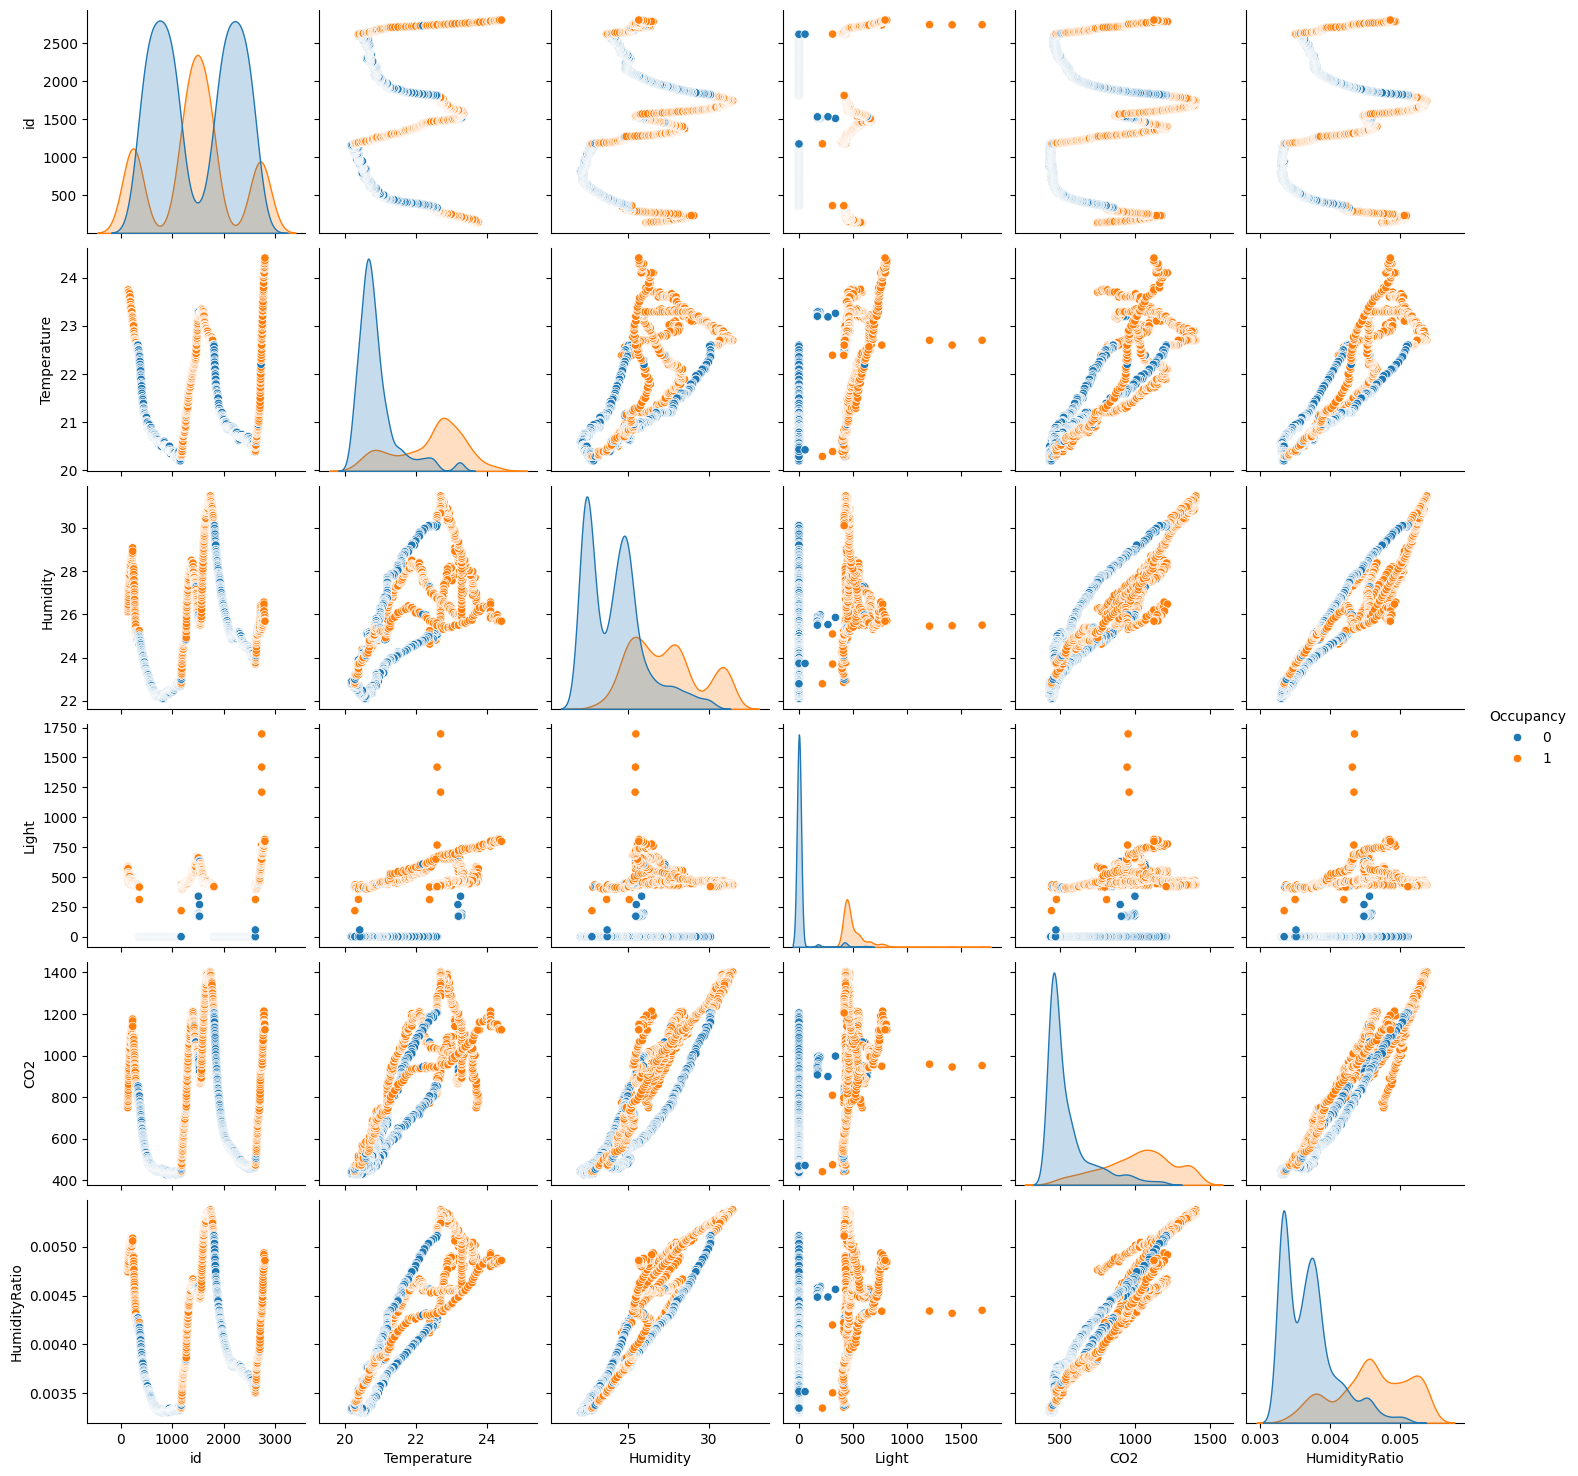

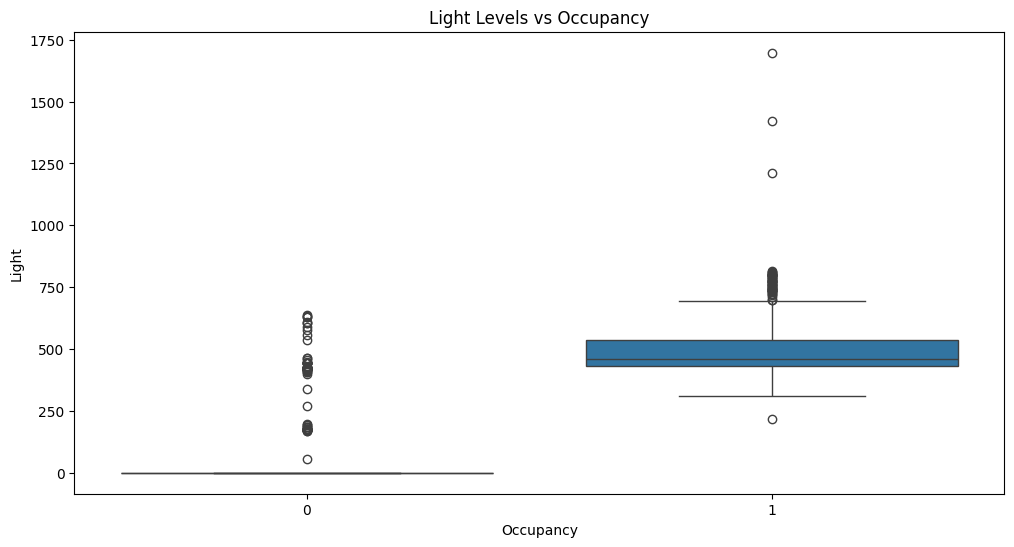

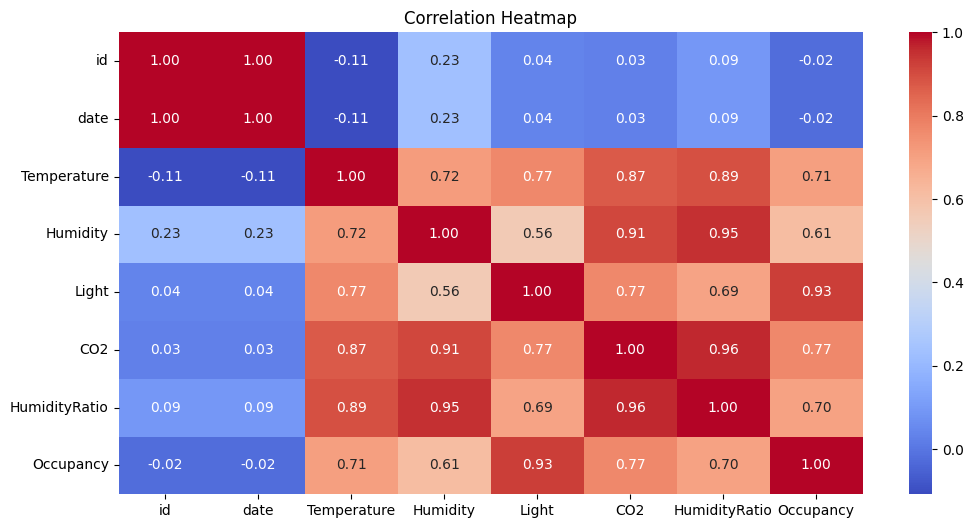

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Display dataset info and first few rows
print("Dataset Information:")
df.info()
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title("Temperature Distribution")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue="Occupancy")
plt.show()

# Boxplots for feature analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Occupancy'], y=df['Light'])
plt.title("Light Levels vs Occupancy")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**2.Build a Model from Scratch**


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Feature selection and scaling
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
X = df[features].values
y = df['Occupancy'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training function
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        weights -= lr * dw
        bias -= lr * db

    return weights, bias

# Training the model
weights, bias = train_logistic_regression(X_train, y_train)

# Predictions
def predict(X, weights, bias):
    return (sigmoid(np.dot(X, weights) + bias) >= 0.5).astype(int)

y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)

# Evaluating model performance
from sklearn.metrics import accuracy_score, classification_report
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9446529080675422
Test Accuracy: 0.9324577861163227
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       350
           1       0.88      0.93      0.90       183

    accuracy                           0.93       533
   macro avg       0.92      0.93      0.93       533
weighted avg       0.93      0.93      0.93       533



**3.Build a Primary Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

# Train Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))

# Evaluate Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Comparing Models
if accuracy_score(y_test, rf_preds) > accuracy_score(y_test, log_reg_preds):
    print("Random Forest performed better.")
else:
    print("Logistic Regression performed better.")


Logistic Regression Performance:
Accuracy: 0.9774859287054409
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       350
           1       0.94      1.00      0.97       183

    accuracy                           0.98       533
   macro avg       0.97      0.98      0.98       533
weighted avg       0.98      0.98      0.98       533

Random Forest Performance:
Accuracy: 0.9868667917448405
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       350
           1       0.97      0.99      0.98       183

    accuracy                           0.99       533
   macro avg       0.98      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533

Random Forest performed better.


**4.Hyper-parameter Optimization with Cross-Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Hyper-parameter Optimization for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Hyper-parameter Optimization for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'liblinear'}


**5.Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform Feature Selection
selector = SelectKBest(f_classif, k=3)
X_new = selector.fit_transform(X, y)
selected_features = [features[i] for i in selector.get_support(indices=True)]
print("Selected Features:", selected_features)


Selected Features: ['Temperature', 'Light', 'CO2']


**6.Final Model**


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Using only the selected features from Feature Selection
selected_feature_indices = [features.index(f) for f in selected_features]
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Train Final Logistic Regression Model with Best Hyperparameters
final_lr = LogisticRegression(C=1, solver='liblinear')  # Best params from hyperparameter tuning
final_lr.fit(X_train_selected, y_train)
y_pred_lr = final_lr.predict(X_test_selected)

# Train Final Random Forest Model with Best Hyperparameters
final_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)  # Best params from hyperparameter tuning
final_rf.fit(X_train_selected, y_train)
y_pred_rf = final_rf.predict(X_test_selected)

# Evaluate Logistic Regression Model
print("Final Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Evaluate Random Forest Model
print("\nFinal Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Final Logistic Regression Model Performance:
Accuracy: 0.9774859287054409
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       350
           1       0.94      1.00      0.97       183

    accuracy                           0.98       533
   macro avg       0.97      0.98      0.98       533
weighted avg       0.98      0.98      0.98       533


Final Random Forest Model Performance:
Accuracy: 0.9924953095684803
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       350
           1       0.98      1.00      0.99       183

    accuracy                           0.99       533
   macro avg       0.99      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533

